# Importar librerías y datos

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("datos.csv")

# Exploración y limpieza de datos

## Exploración de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783932 entries, 0 to 5783931
Data columns (total 8 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   cdc_case_earliest_dt     object
 1   current_status           object
 2   sex                      object
 3   age_group                object
 4   race_ethnicity_combined  object
 5   hosp_yn                  object
 6   death_yn                 object
 7   medcond_yn               object
dtypes: object(8)
memory usage: 353.0+ MB


In [ ]:
df.describe()

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,medcond_yn
count,5783932,5783932,5783932,5783932,5783932,5783932,5783932,5783932
unique,360,2,5,10,9,2,2,4
top,2020/11/30,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,No,Missing
freq,59783,5270869,3065510,1012120,2646505,5161470,5492275,3986504


In [ ]:
df.head()

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn,medcond_yn
0,2020/01/01,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,No,Missing
1,2020/01/01,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,No,Missing
2,2020/01/01,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,No,Missing
3,2020/01/01,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,No,Yes
4,2020/01/01,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,No,No


## Verificar vacíos

In [ ]:
print(df.isnull().sum())

cdc_case_earliest_dt       0
current_status             0
sex                        0
age_group                  0
race_ethnicity_combined    0
hosp_yn                    0
death_yn                   0
medcond_yn                 0
dtype: int64


In [ ]:
for columna in df.columns:
  print(f"Valores únicos en {columna}: {df[columna].unique()}")

Valores únicos en cdc_case_earliest_dt : ['2020/01/01' '2020/01/02' '2020/01/03' '2020/01/04' '2020/01/05'
 '2020/01/06' '2020/01/07' '2020/01/08' '2020/01/09' '2020/01/10'
 '2020/01/11' '2020/01/12' '2020/01/13' '2020/01/14' '2020/01/15'
 '2020/01/16' '2020/01/17' '2020/01/18' '2020/01/19' '2020/01/20'
 '2020/01/21' '2020/01/22' '2020/01/23' '2020/01/24' '2020/01/25'
 '2020/01/26' '2020/01/27' '2020/01/28' '2020/01/29' '2020/01/30'
 '2020/01/31' '2020/02/01' '2020/02/02' '2020/02/03' '2020/02/04'
 '2020/02/05' '2020/02/06' '2020/02/07' '2020/02/08' '2020/02/09'
 '2020/02/10' '2020/02/11' '2020/02/12' '2020/02/13' '2020/02/14'
 '2020/02/15' '2020/02/16' '2020/02/17' '2020/02/18' '2020/02/19'
 '2020/02/20' '2020/02/21' '2020/02/22' '2020/02/23' '2020/02/24'
 '2020/02/25' '2020/02/26' '2020/02/27' '2020/02/28' '2020/02/29'
 '2020/03/01' '2020/03/02' '2020/03/03' '2020/03/04' '2020/03/05'
 '2020/03/06' '2020/03/07' '2020/03/08' '2020/03/09' '2020/03/10'
 '2020/03/11' '2020/03/12' '2020/03

## Ajustar nombres de columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783932 entries, 0 to 5783931
Data columns (total 8 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   cdc_case_earliest_dt     object
 1   current_status           object
 2   sex                      object
 3   age_group                object
 4   race_ethnicity_combined  object
 5   hosp_yn                  object
 6   death_yn                 object
 7   medcond_yn               object
dtypes: object(8)
memory usage: 353.0+ MB


In [ ]:
df = df.rename(columns={'cdc_case_earliest_dt ': 'Fecha'})
df = df.rename(columns={'current_status': 'Estado'})
df = df.rename(columns={'sex': 'Sexo'})
df = df.rename(columns={'age_group': 'Edad'})
df = df.rename(columns={'race_ethnicity_combined': 'Raza'})
df = df.rename(columns={'hosp_yn': 'Hospitalización'})
df = df.rename(columns={'death_yn': 'Muerte'})
df = df.rename(columns={'medcond_yn': 'Comorbilidad'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783932 entries, 0 to 5783931
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Fecha            object
 1   Estado           object
 2   Sexo             object
 3   Edad             object
 4   Raza             object
 5   Hospitalización  object
 6   Muerte           object
 7   Comorbilidad     object
dtypes: object(8)
memory usage: 353.0+ MB


## Traducir información y agrupar categorías

Los casos faltantes se categorizan como desconocidos.

In [ ]:
import pandas as pd


# Diccionarios de traducción
traduccion = {
    'Estado': {
        'Laboratory-confirmed case': 'Confirmado',
        'Probable Case': 'probable'
    },
    'Sexo': {
        'Male': 'Masculino',
        'Female': 'Femenino',
        'Unknown': 'Desconocido',
        'Missing': 'Desconocido',
        'Other': 'Otro'
    },
    'Edad': {
        '20 - 29 Years': '20 - 29 Años',
        '40 - 49 Years': '40 - 49 Años',
        '60 - 69 Years': '60 - 69 Años',
        '50 - 59 Years': '50 - 59 Años',
        '30 - 39 Years': '30 - 39 Años',
        'Missing': 'Desconocido',
        '10 - 19 Years': '10 - 19 Años',
        '70 - 79 Years': '70 - 79 Años',
        '80+ Years': '80+ Años',
        '0 - 9 Years': '0 - 9 Años'
    },
    'Raza': {
        'Hispanic/Latino': 'Hispano/Latino',
        'White, Non-Hispanic': 'Blanco, No Hispano',
        'Black, Non-Hispanic': 'Negro, No Hispano',
        'Asian, Non-Hispanic': 'Asiático, No Hispano',
        'Unknown': 'Desconocido',
        'Multiple/Other, Non-Hispanic': 'Múltiple/Otro, No Hispano',
        'Missing': 'Desconocido',
        'American Indian/Alaska Native, Non-Hispanic': 'Indígena Americano/Nativo de Alaska, No Hispano',
        'Native Hawaiian/Other Pacific Islander, Non-Hispanic': 'Nativo Hawaiano/Otro Isleño del Pacífico, No Hispano'
    },
    'Hospitalización': {
        'No': 'No',
        'Yes': 'Sí'
    },
    'Muerte': {
        'No': 'No',
        'Yes': 'Sí'
    },
    'Comorbilidad': {
        'Missing': 'Desconocido',
        'Yes': 'Sí',
        'No': 'No',
        'Unknown': 'Desconocido'
    }
}

# Aplicar las traducciones a df
for column, trad in traduccion.items():
    df[column] = df[column].replace(trad)

## Ajustar formatos

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y/%m/%d')
print(df.dtypes)
print(df.head())

Fecha              datetime64[ns]
Estado                     object
Sexo                       object
Edad                       object
Raza                       object
Hospitalización            object
Muerte                     object
Comorbilidad               object
dtype: object
       Fecha      Estado       Sexo          Edad                Raza  \
0 2020-01-01  Confirmado  Masculino  20 - 29 Años      Hispano/Latino   
1 2020-01-01  Confirmado  Masculino  40 - 49 Años  Blanco, No Hispano   
2 2020-01-01  Confirmado  Masculino  40 - 49 Años  Blanco, No Hispano   
3 2020-01-01  Confirmado  Masculino  60 - 69 Años  Blanco, No Hispano   
4 2020-01-01  Confirmado  Masculino  60 - 69 Años  Blanco, No Hispano   

  Hospitalización Muerte Comorbilidad  
0              No     No  Desconocido  
1              No     No  Desconocido  
2              No     No  Desconocido  
3              No     No           Sí  
4              No     No           No  


In [ ]:
mapeo_edad = {
    '80+ Años': '9. 80+ Años',
    '70 - 79 Años': '8. 70 - 79 Años',
    '60 - 69 Años': '7. 60 - 69 Años',
    '50 - 59 Años': '6. 50 - 59 Años',
    '40 - 49 Años': '5. 40 - 49 Años',
    '30 - 39 Años': '4. 30 - 39 Años',
    '20 - 29 Años': '3. 20 - 29 Años',
    '10 - 19 Años': '2. 10 - 19 Años',
    '0 - 9 Años': '1. 0 - 9 Años',
    'Missing': '0. Desconocido'
}

# Mapear los valores de la columna 'Edad' a sus valores numéricos
# Asegurarse de que los valores en 'Edad' coincidan con el formato del mapeo
df['Edad'] = df['Edad'].str.strip()  # Eliminar espacios adicionales
df['Edad_ordenada'] = df['Edad'].map(mapeo_edad)  # Aplicar el mapeo
df.head()

,Fecha,Estado,Sexo,Edad,Raza,Hospitalización,Muerte,Comorbilidad,Edad_ordenada
0,2020-01-01,Confirmado,Masculino,20 - 29 Años,Hispano/Latino,No,No,Desconocido,3. 20 - 29 Años
1,2020-01-01,Confirmado,Masculino,40 - 49 Años,"Blanco, No Hispano",No,No,Desconocido,5. 40 - 49 Años
2,2020-01-01,Confirmado,Masculino,40 - 49 Años,"Blanco, No Hispano",No,No,Desconocido,5. 40 - 49 Años
3,2020-01-01,Confirmado,Masculino,60 - 69 Años,"Blanco, No Hispano",No,No,Sí,7. 60 - 69 Años
4,2020-01-01,Confirmado,Masculino,60 - 69 Años,"Blanco, No Hispano",No,No,No,7. 60 - 69 Años


# Identificar caracteristicas y relaciones entre variables

## Estadísticas descriptivas

-------Estadísticas descriptivas de Fecha-----------


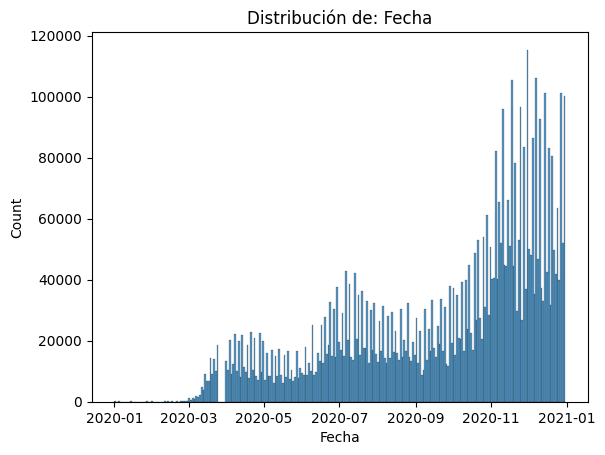

Moda: ['2020-11-30T00:00:00.000000000']
-------Estadísticas descriptivas de Estado-----------


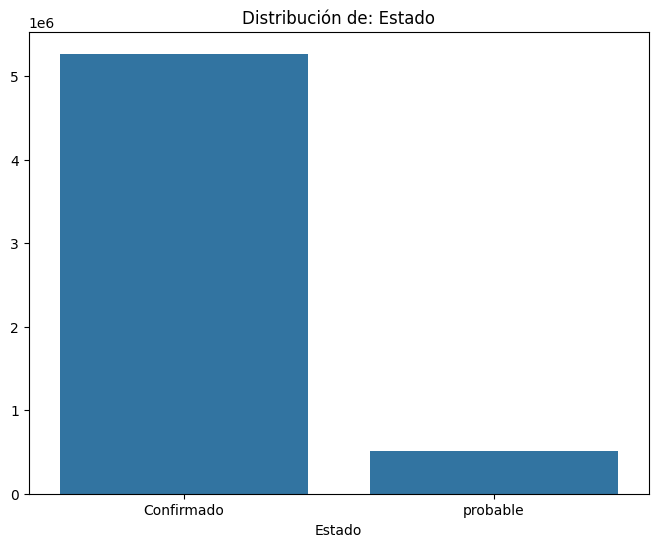

Moda: ['Confirmado']
-------Estadísticas descriptivas de Sexo-----------


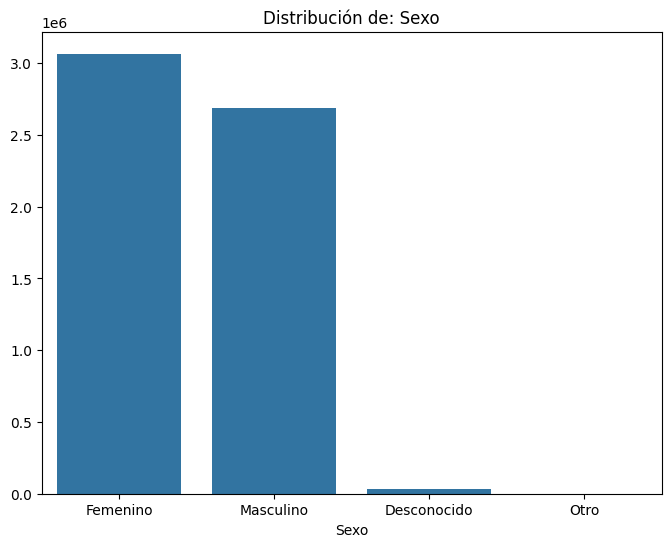

Moda: ['Femenino']
-------Estadísticas descriptivas de Edad-----------


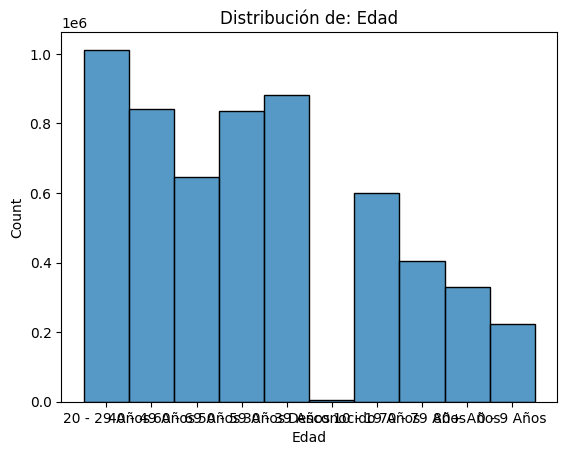

Moda: ['20 - 29 Años']
-------Estadísticas descriptivas de Raza-----------


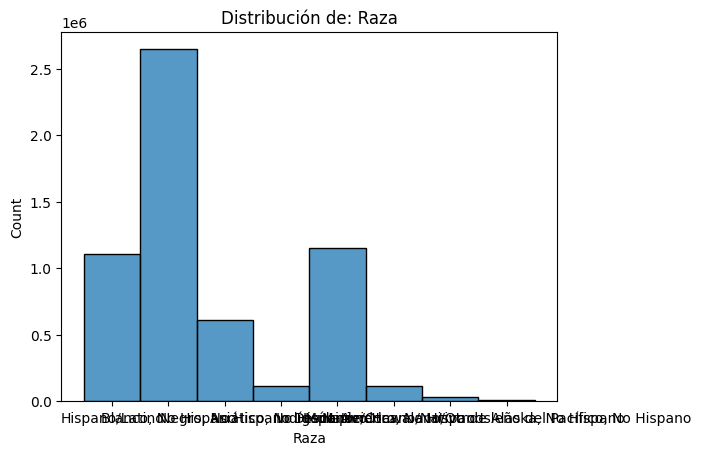

Moda: ['Blanco, No Hispano']
-------Estadísticas descriptivas de Hospitalización-----------


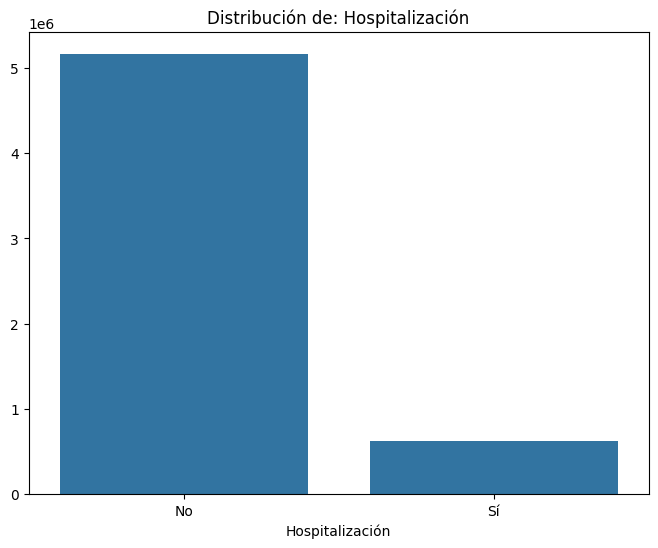

Moda: ['No']
-------Estadísticas descriptivas de Muerte-----------


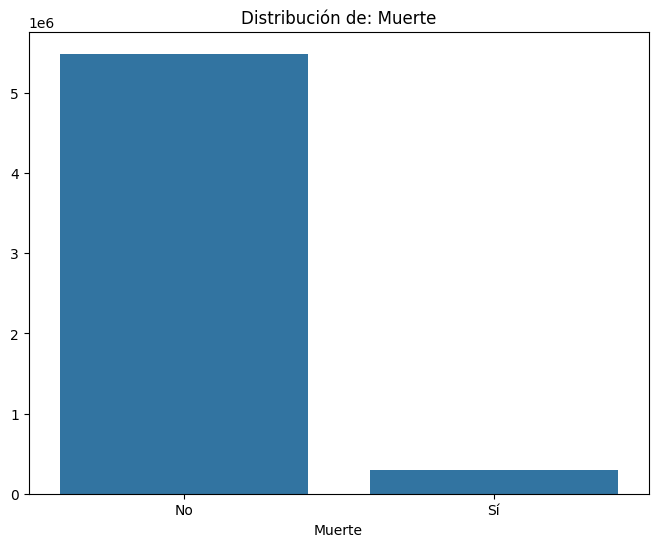

Moda: ['No']
-------Estadísticas descriptivas de Comorbilidad-----------


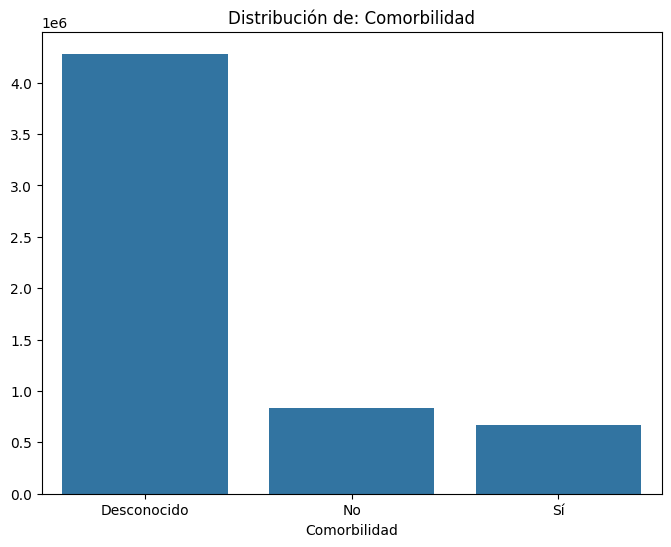

Moda: ['Desconocido']
-------Estadísticas descriptivas de Edad_ordenada-----------


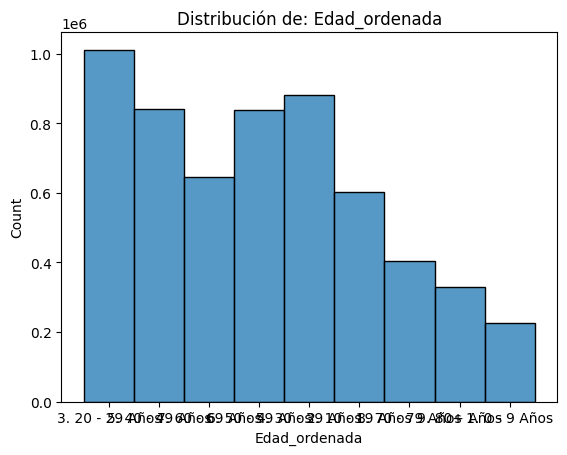

Moda: ['3. 20 - 29 Años']


In [ ]:
def estadisticas_descriptivas(df):
    for x in df.columns:
        print(f"-------Estadísticas descriptivas de {x}-----------")
        counts = df[x].value_counts()
        if len(counts) > 6:
            sb.histplot(df[x])
            plt.title(f"Distribución de: {x}")
            plt.show()
            print(f"Moda: {df[x].mode().values}")
        else:
            plt.figure(figsize=(8, 6))
            sb.barplot(x=counts.index, y=counts.values)
            plt.title(f"Distribución de: {x}")
            plt.show()
            print(f"Moda: {df[x].mode().values}")
estadisticas_descriptivas(df)

## Cantidad de muertes y hospitalizaciones

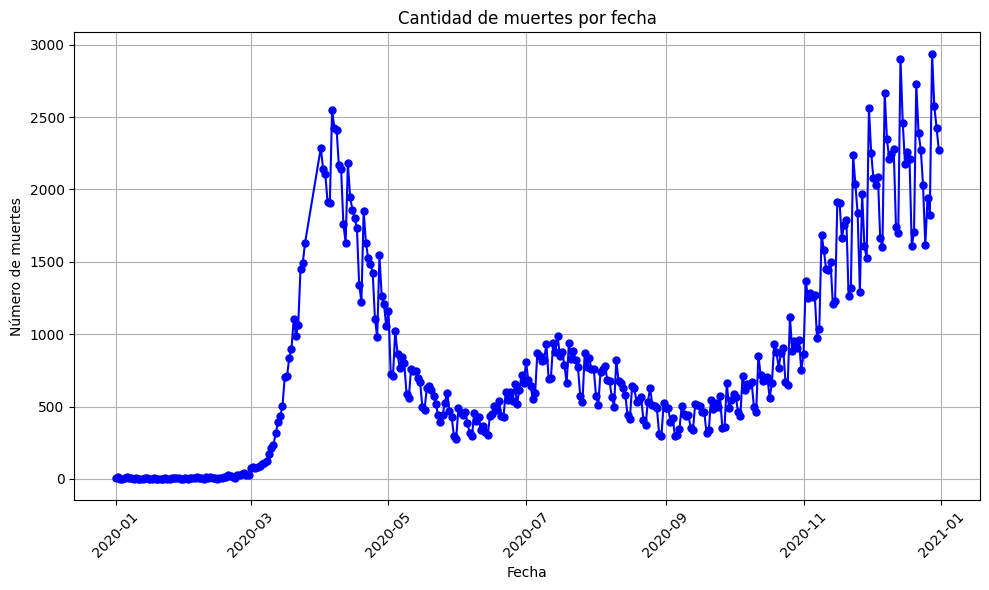

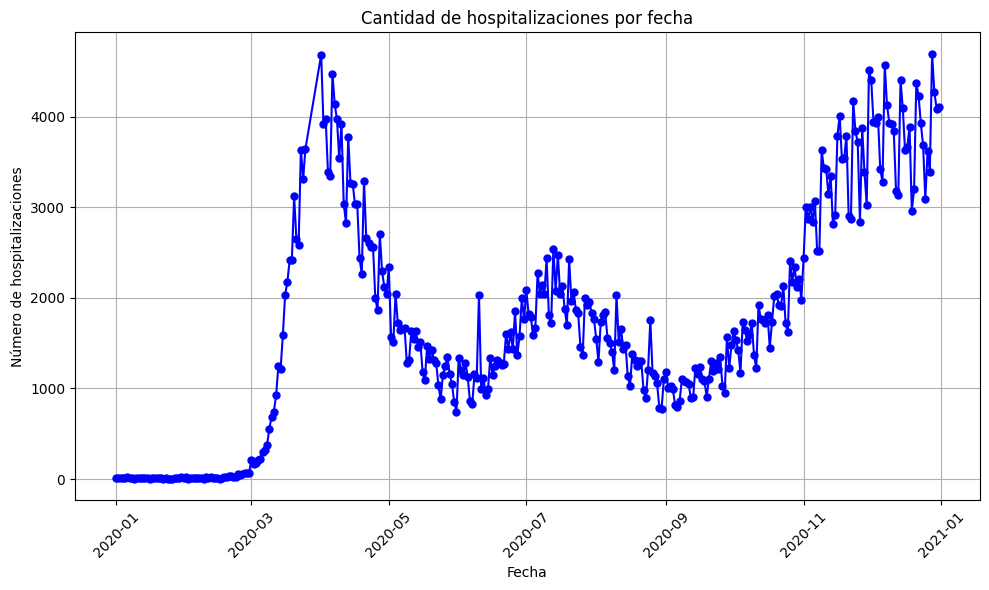

<ipython-input-53-99ba43588663>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=columna, palette='Set2')


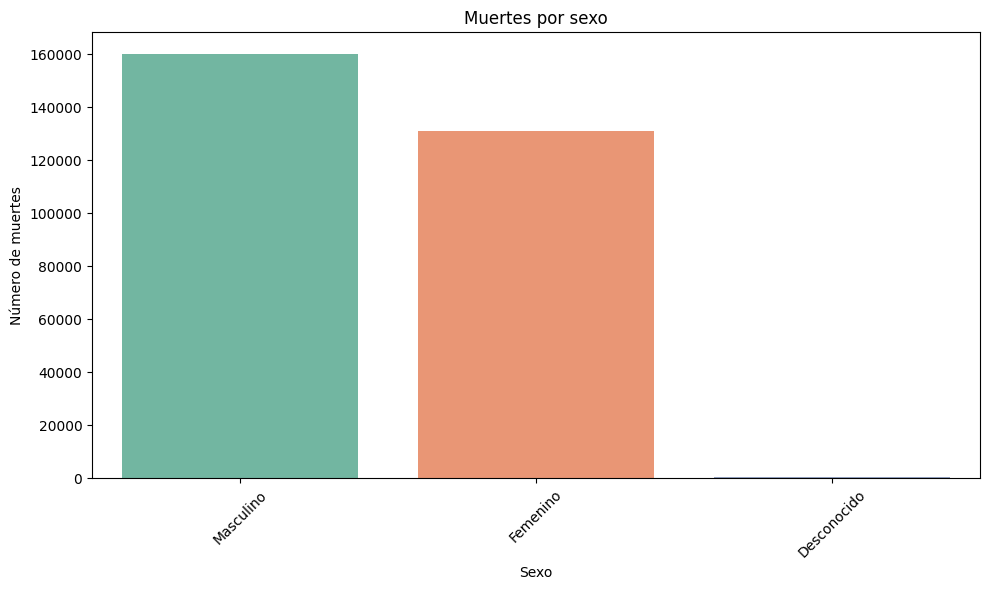

<ipython-input-53-99ba43588663>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=columna, palette='Set2')


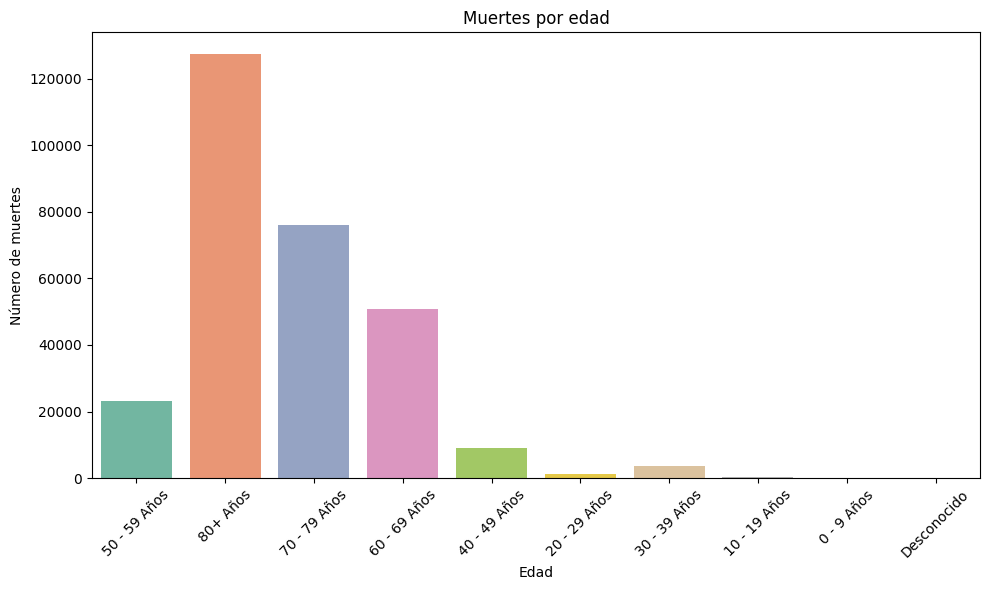

<ipython-input-53-99ba43588663>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=columna, palette='Set2')


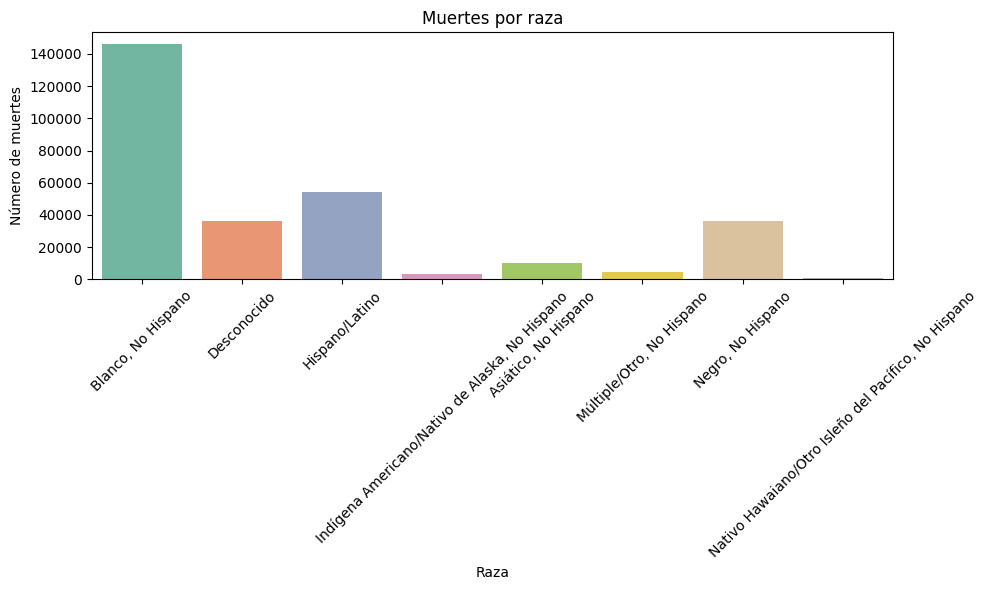

<ipython-input-53-99ba43588663>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=columna, palette='Set2')


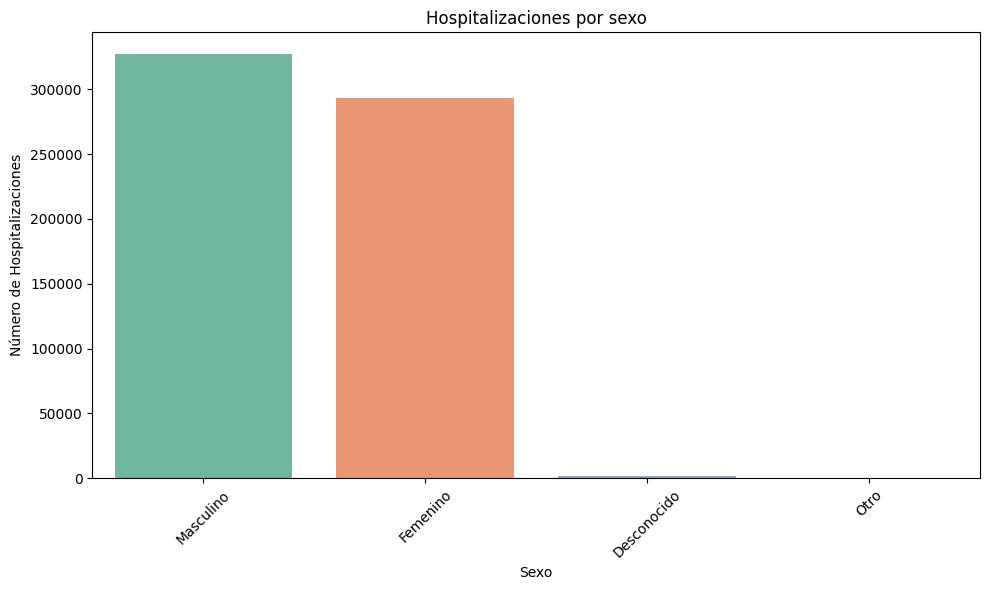

<ipython-input-53-99ba43588663>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=columna, palette='Set2')


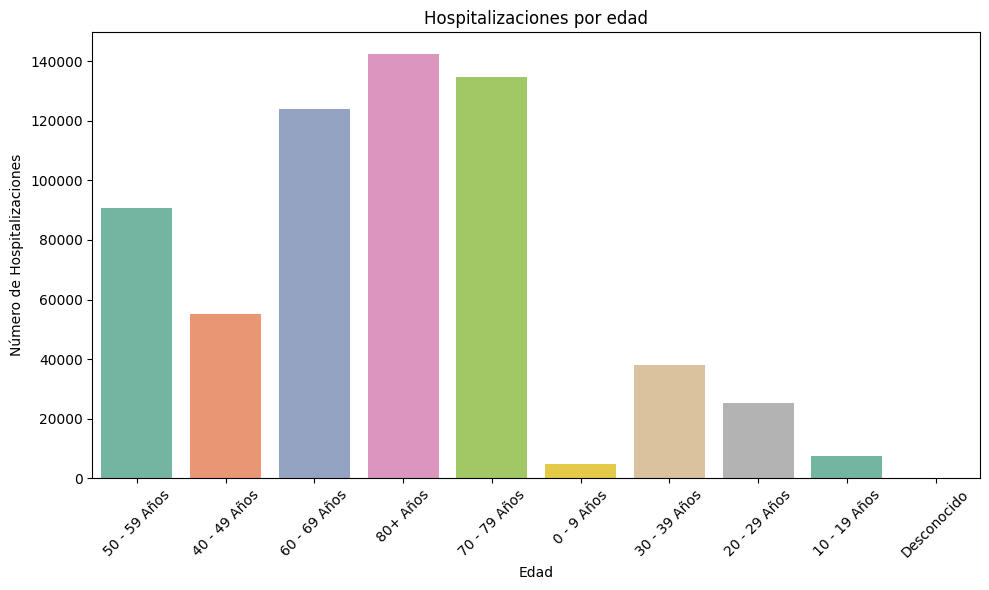

<ipython-input-53-99ba43588663>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=columna, palette='Set2')


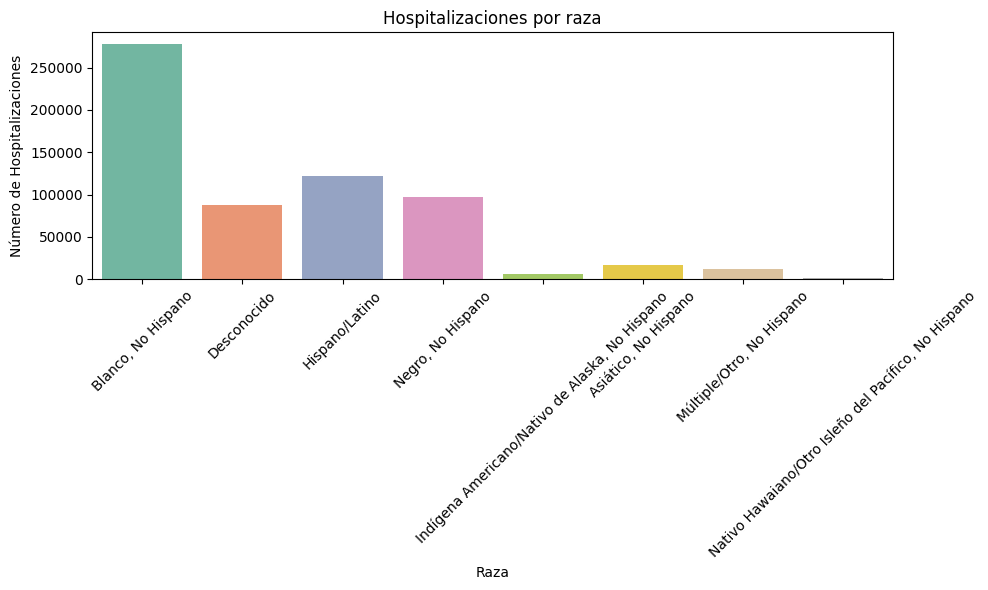

In [ ]:

# Filtramos el DataFrame para quedarnos solo con muertes y hospitalizaciones
df_muertes = df[df['Muerte'] == 'Sí']
df_hospitalizaciones = df[df['Hospitalización'] == 'Sí']


# Función para crear un gráfico de barras
def crear_grafico_barras(df, columna, titulo, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sb.countplot(data=df, x=columna, palette='Set2')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Función para crear un gráfico de línea  por fecha
def crear_grafico_linea(df, columna_fecha, titulo, xlabel, ylabel):
    casos_por_fecha = df.groupby(columna_fecha).size()
    plt.figure(figsize=(10, 6))
    plt.plot(casos_por_fecha.index, casos_por_fecha.values, marker='o', color='b', linestyle='-', markersize=5)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. Crear el gráfico de línea de muertes y hospitalizaciones por fecha
crear_grafico_linea(df_muertes, 'Fecha', 'Cantidad de muertes por fecha', 'Fecha', 'Número de muertes')
crear_grafico_linea(df_hospitalizaciones, 'Fecha', 'Cantidad de hospitalizaciones por fecha', 'Fecha', 'Número de hospitalizaciones')

# 2. Crear gráficos de barras para Sexo, Edad y Raza
crear_grafico_barras(df_muertes, 'Sexo', 'Muertes por sexo', 'Sexo', 'Número de muertes')
crear_grafico_barras(df_muertes, 'Edad', 'Muertes por edad', 'Edad', 'Número de muertes')
crear_grafico_barras(df_muertes, 'Raza', 'Muertes por raza', 'Raza', 'Número de muertes')


# 2. Crear gráficos de barras para Sexo, Edad y Raza
crear_grafico_barras(df_hospitalizaciones, 'Sexo', 'Hospitalizaciones por sexo', 'Sexo', 'Número de Hospitalizaciones')
crear_grafico_barras(df_hospitalizaciones, 'Edad', 'Hospitalizaciones por edad', 'Edad', 'Número de Hospitalizaciones')
crear_grafico_barras(df_hospitalizaciones, 'Raza', 'Hospitalizaciones por raza', 'Raza', 'Número de Hospitalizaciones')


# Cargue

In [55]:
df.head()

,Fecha,Estado,Sexo,Edad,Raza,Hospitalización,Muerte,Comorbilidad,Edad_ordenada
0,2020-01-01,Confirmado,Masculino,20 - 29 Años,Hispano/Latino,No,No,Desconocido,3. 20 - 29 Años
1,2020-01-01,Confirmado,Masculino,40 - 49 Años,"Blanco, No Hispano",No,No,Desconocido,5. 40 - 49 Años
2,2020-01-01,Confirmado,Masculino,40 - 49 Años,"Blanco, No Hispano",No,No,Desconocido,5. 40 - 49 Años
3,2020-01-01,Confirmado,Masculino,60 - 69 Años,"Blanco, No Hispano",No,No,Sí,7. 60 - 69 Años
4,2020-01-01,Confirmado,Masculino,60 - 69 Años,"Blanco, No Hispano",No,No,No,7. 60 - 69 Años


In [56]:
# Exportar el DataFrame a un archivo CSV
df.to_csv('data.csv', index=False)